<a href="https://colab.research.google.com/github/JahedNaghipoor/Deep_Learning/blob/master/Deep_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data_info = pd.read_csv('/content/drive/My Drive/database/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
data_info.head(10)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [0]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/database/lending_club_loan_two.csv')

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Section 1: Exploratory Data Analysis

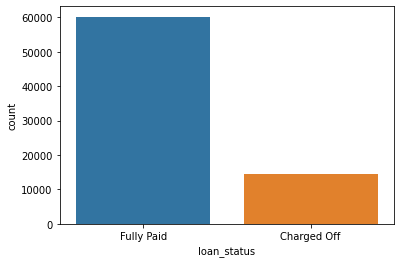

In [12]:
sns.countplot('loan_status', data=df)

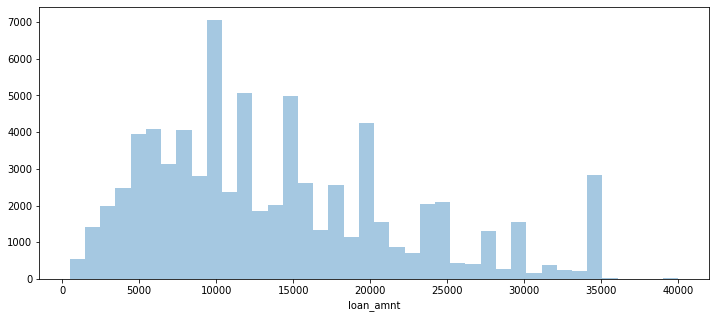

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(df['loan_amnt'], kde=False, bins=40)

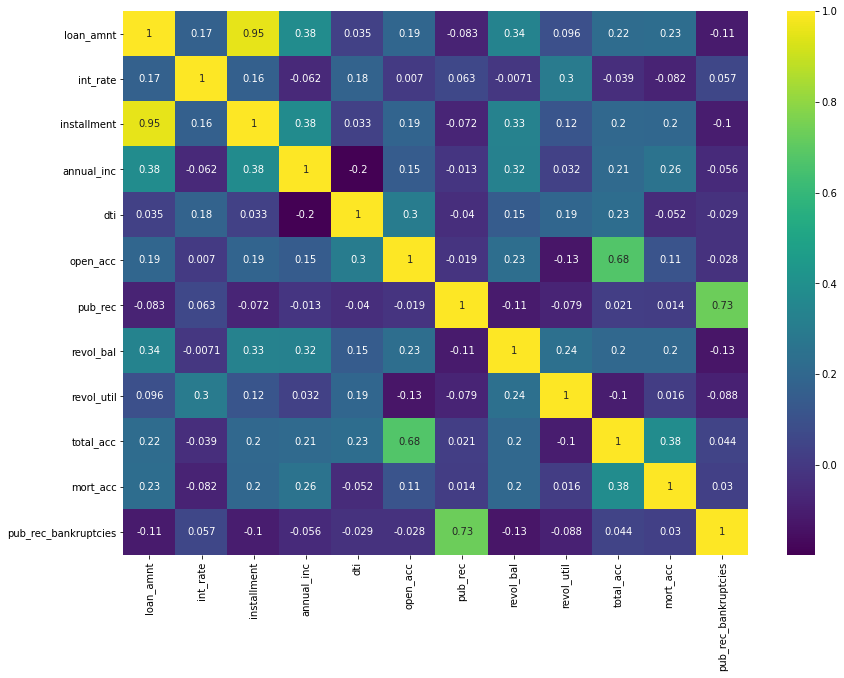

In [14]:
#correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


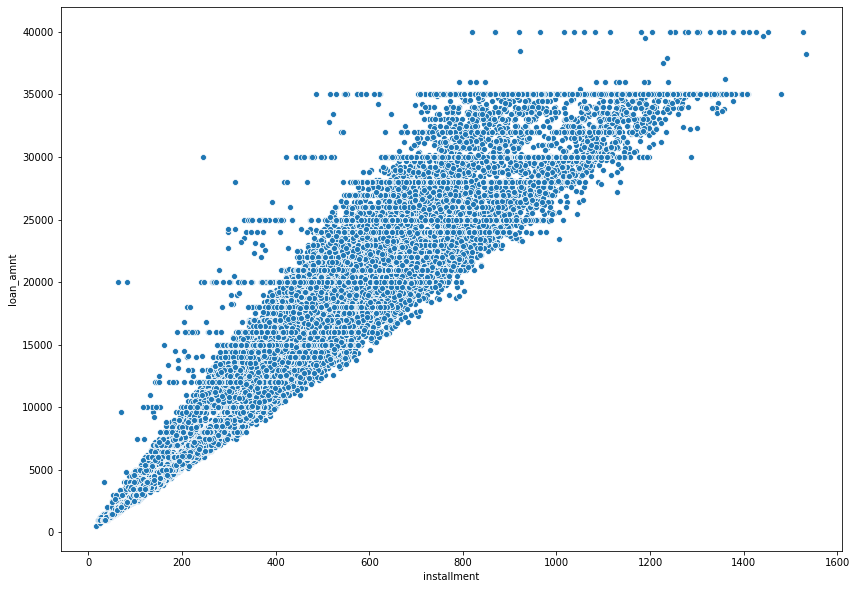

In [17]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,14586.0,15088.264432,8490.847063,1000.0,8500.0,14000.0,20000.0,40000.0
Fully Paid,60188.0,13864.256164,8316.302243,500.0,7500.0,12000.0,19400.0,40000.0


In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

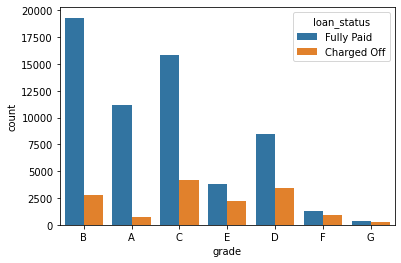

In [20]:
#how many grade vs loan_status
sns.countplot(x='grade', data=df, hue='loan_status')

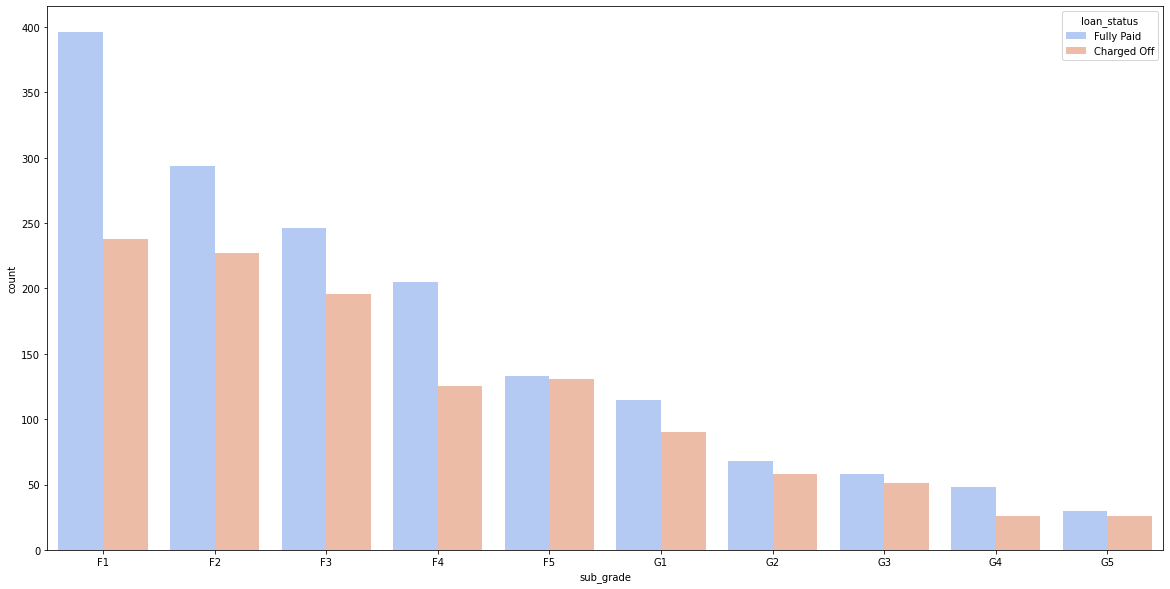

In [21]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(20,10))
subgrade_order= sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order, palette='coolwarm', hue='loan_status')

In [0]:
df['loan_repaid'] =  df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})

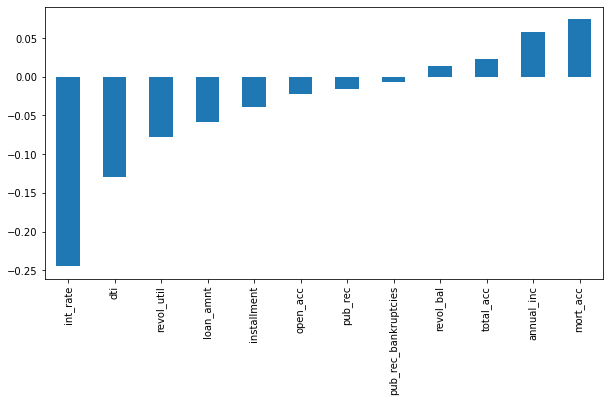

In [23]:
plt.figure(figsize=(10,5))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Data preprocessing


In [24]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  1
emp_title               4285
emp_length              3434
home_ownership             1
annual_inc                 1
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
title                    325
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                56
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                7121
pub_rec_bankruptcies      88
address                    1
loan_repaid                1
dtype: int64

In [25]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.001337
emp_title               5.730525
emp_length              4.592444
home_ownership          0.001337
annual_inc              0.001337
verification_status     0.001337
issue_d                 0.001337
loan_status             0.001337
purpose                 0.001337
title                   0.434637
dti                     0.001337
earliest_cr_line        0.001337
open_acc                0.001337
pub_rec                 0.001337
revol_bal               0.001337
revol_util              0.074891
total_acc               0.001337
initial_list_status     0.001337
application_type        0.001337
mort_acc                9.523236
pub_rec_bankruptcies    0.117686
address                 0.001337
loan_repaid             0.001337
dtype: float64

In [26]:
df['emp_title'].nunique()

41222

In [27]:
df['emp_title'].value_counts()

Teacher                    848
Manager                    812
Registered Nurse           369
Supervisor                 357
RN                         327
                          ... 
Accu-Serve                   1
ALEGRIA & COMPANY, PS        1
Corporate Underwiter         1
Lutheran Medical Center      1
Marketing Lead               1
Name: emp_title, Length: 41222, dtype: int64

In [0]:
df=df.drop('emp_title', axis=1)

In [36]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [0]:
emp_length_order = ['< 1 year', '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

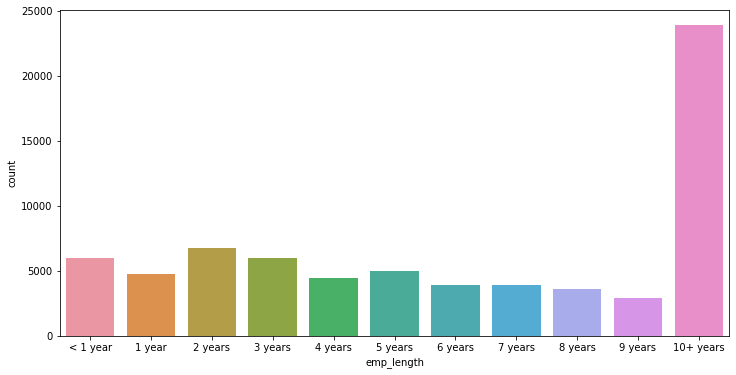

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, order=emp_length_order)

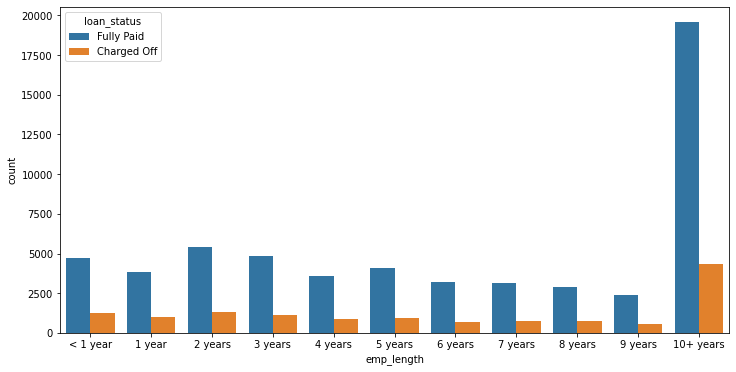

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

In [0]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [0]:
emp_length= emp_co/(emp_co+emp_fp)

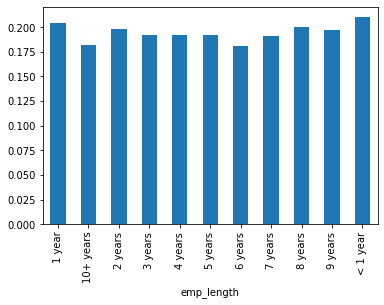

In [47]:
emp_length.plot(kind='bar')

In [0]:
# difference is not too much, so we drop it
#df = df.drop('emp_length', axis=1)

In [0]:
df = df.drop('title', axis=1)

In [52]:
feat_info('mort_acc')

Number of mortgage accounts.


In [53]:
df['mort_acc'].value_counts()

0.0     26313
1.0     11445
2.0      9528
3.0      7196
4.0      5214
5.0      3377
6.0      2158
7.0      1114
8.0       612
9.0       312
10.0      171
11.0       83
12.0       49
14.0       26
13.0       23
15.0       10
16.0        6
17.0        5
19.0        3
22.0        2
25.0        2
24.0        1
21.0        1
34.0        1
18.0        1
32.0        1
Name: mort_acc, dtype: int64

In [75]:
df.corr()['mort_acc'].drop('mort_acc').sort_values()

int_rate               -0.081629
dti                    -0.052493
pub_rec                 0.013591
revol_util              0.016155
pub_rec_bankruptcies    0.030213
loan_repaid             0.074557
open_acc                0.113887
installment             0.199271
revol_bal               0.203950
loan_amnt               0.227701
annual_inc              0.260193
total_acc               0.382437
Name: mort_acc, dtype: float64

In [79]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.032258
4.0      0.091463
5.0      0.107143
6.0      0.168490
           ...   
105.0    6.000000
106.0    0.000000
108.0    0.000000
111.0    4.000000
135.0    3.000000
Name: mort_acc, Length: 103, dtype: float64

In [0]:
def filling_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [78]:
df['mort_acc'] = df.apply(lambda x: filling_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

KeyError: ignored